#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

#
# Serge Koussevitzky
#### Entity ID : 64e2e1b0-cf8e-433e-9423-d0c2fe30aa52

In [2]:
entity_id = '64e2e1b0-cf8e-433e-9423-d0c2fe30aa52'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
76419,64e2e1b0-cf8e-433e-9423-d0c2fe30aa52,Serge Koussevitzky,NaN,False,NaN,NaN,NaN


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
76419,4389,1118,22,1,2,0


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
6826,1947-04-01 00:00:00.000000,"Sanders Theatre, Harvard University, Cambridge",United States,NaN,"Boston Symphony Orchestra concert program, Tri...",NaN,North America
6828,1931-04-06 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, You...",NaN,North America
6829,1931-04-07 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, You...",NaN,North America
6831,1935-04-16 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Tue...",NaN,North America
7005,1927-03-04 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America
7137,1933-10-31 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Tue...",NaN,North America
7258,1927-03-05 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America
7387,1938-02-09 00:00:00.000000,"High School Auditorium, Montclair",United States,NaN,"Boston Symphony Orchestra concert program, Tri...",NaN,North America
7388,1925-03-20 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America
7389,1925-03-21 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
725,Bohuslav Martinu,SYMPHONY NO. 3,15
1114,Richard Wagner,OVERTURE TO RIENZI,15
2377,Manuel Falla,"THREE DANCES FROM 'EL SOMBRERO DE TRES PICOS,'...",15
2379,Sergei Rachmaninoff,"THE ISLE OF THE DEAD, OPUS 29",15
2381,Alexander Borodin,'POLOVTZIAN DANCES' FROM PRINCE IGOR,15
2382,Johannes Brahms,"VARIATIONS ON A THEME BY HAYDN, OPUS 56A",15
2385,Maurice Ravel,"LA VALSE, POÈME CHORÉOGRAPHIQUE",15
2386,Robert Schumann,"SYMPHONY NO. 1 IN B-FLAT MAJOR, OPUS 38, 'SPRING'",15
2387,Claude Debussy,PRELUDE TO THE AFTERNOON OF A FAUN,15
2388,Franz Liszt,CONCERTO NO. 1 IN E-FLAT MAJOR FOR PIANO AND O...,15


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
23609,\nArticleRuth Posselt: American Violinist. Wor...,NaN,NaN
74338,Forgotten symphonies: the hidden giants of Ame...,https://www.gramophone.co.uk/features/article/...,Forgotten symphonies: the hidden giants of Ame...
74339,Debussy's La mer: a complete guide to the best...,https://www.gramophone.co.uk/features/article/...,Debussy's La mer: a complete guide to the best...
74340,The 50 greatest conductors of all time,https://www.gramophone.co.uk/features/article/...,The 50 greatest conductors of all time
74341,Why Leonard Bernstein's music demands to be da...,https://www.gramophone.co.uk/features/article/...,Why Leonard Bernstein's music demands to be da...
74342,Alleluias: a specialist's guide,https://www.gramophone.co.uk/features/article/...,Alleluias: a specialist's guide
74343,Martinů on record,https://www.gramophone.co.uk/features/article/...,Martinů on record
74344,A guide to the best recordings of Beethoven's ...,https://www.gramophone.co.uk/features/article/...,A guide to the best recordings of Beethoven's ...
74345,Béla Bartók – the life and music of the Hungar...,https://www.gramophone.co.uk/features/article/...,Béla Bartók – the life and music of the Hungar...
74346,Prokofiev's Peter and the Wolf – which recordi...,https://www.gramophone.co.uk/features/article/...,Prokofiev's Peter and the Wolf – which recordi...


In [8]:
# One example of media mention
df_medias.iloc[2].comparable_text

"Debussy's La mer: a complete guide to the best recordings"

## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date
133670,2051.0,177.0,111.0,29.0,NaN,2015-10-01
133671,2258.0,218.0,23.0,24.0,NaN,2015-11-01
133672,2126.0,155.0,33.0,35.0,NaN,2015-12-01
133673,1822.0,196.0,43.0,35.0,NaN,2016-01-01
133674,1856.0,187.0,28.0,27.0,NaN,2016-02-01


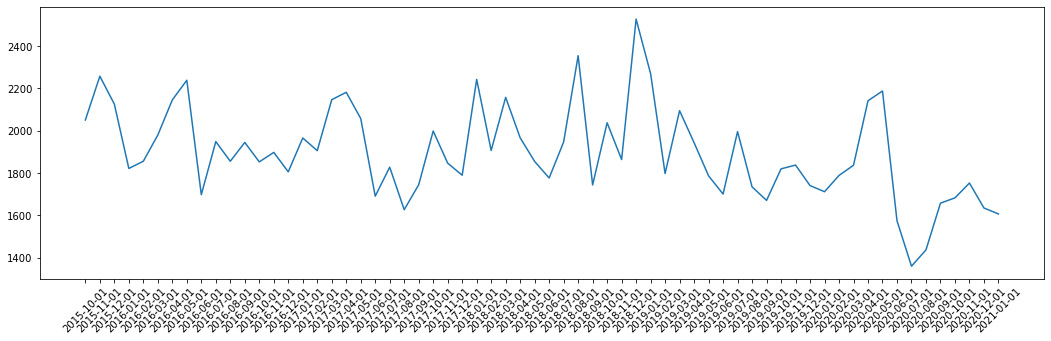

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
3,Conductor


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['koussevitzky serge', 'serge koussevitzky']]

## 7 - Biographies 

In [14]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source


In [15]:
# One bography example 
if len(df_bios) > 0 : 
    df_bios.iloc[0].detail